# Pymaceuticals Inc.
---

### Analysis

- Looking at the the charts for Capomulin there is definitly a correlation between weight and tumor size for the mice. As the weight goes up so does the size of the tumor.
- Infubinol has a potential outlier on the plotted that will need to be studied and revisited. 

-Overtime with treatment the tumor for the mouse I chose to focus on showed a decrese in size showing a postive trend for the treatment.

 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress    

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df_mouse_merge = pd.merge(study_results, mouse_metadata, on="Mouse ID" , how="right")

# Display the data table for preview
df_mouse_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [3]:
# Checking the number of mice.
len(df_mouse_merge["Mouse ID"].unique())


249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
counted=df_mouse_merge[df_mouse_merge.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
counted["Mouse ID"].value_counts()

g989    10
Name: Mouse ID, dtype: int64

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
counted=df_mouse_merge[df_mouse_merge.duplicated(["Mouse ID", "Timepoint"], keep=False)]
counted

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_clean_data=df_mouse_merge.drop_duplicates(["Mouse ID", "Timepoint"], keep=False)
df_clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [7]:
# Checking the number of mice in the clean DataFrame.
print(len(df_clean_data["Mouse ID"].unique()))

249


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
df_grouped=df_clean_data.groupby(["Drug Regimen"])
df_grouped.head()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumormean=df_grouped["Tumor Volume (mm3)"].mean()
tumormedian=df_grouped["Tumor Volume (mm3)"].median()
tumorvar=df_grouped["Tumor Volume (mm3)"].var()
tumorstd=df_grouped["Tumor Volume (mm3)"].std()
tumorsem=df_grouped["Tumor Volume (mm3)"].sem()

tumor_summary = pd.DataFrame({"Mean Tumor Volume":tumormean, "Median Tumor Volume": tumormedian,
                              "Tumor Volume Variance":tumorvar, "Tummor Volume Std. Dev.":tumorstd, 
                              "Tumor Volume Std. Err.":tumorsem})
tumor_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tummor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

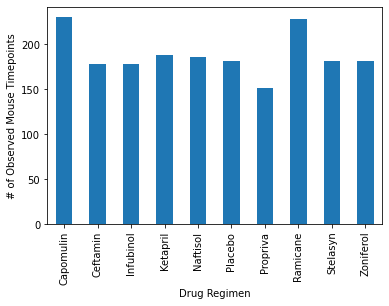

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
micecount=df_clean_data.groupby(["Drug Regimen"]).count()['Mouse ID']

micepandas=micecount.plot.bar(x = "Drug Regimen", y="Mouse ID")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

<function matplotlib.pyplot.show(close=None, block=None)>

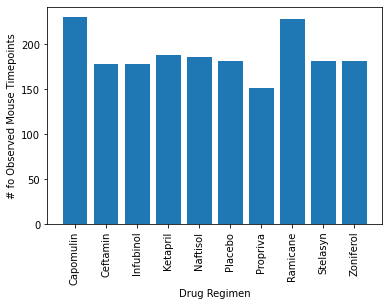

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis=np.arange(len(micecount))
y_axis = micecount

tick_location=[value for value in x_axis]

plt.bar(x_axis, y_axis, align='center')

plt.xticks(tick_location, micecount.index.values, rotation="vertical")

plt.xlabel("Drug Regimen")
plt.ylabel("# fo Observed Mouse Timepoints")
plt.show


<AxesSubplot:ylabel='Mouse ID'>

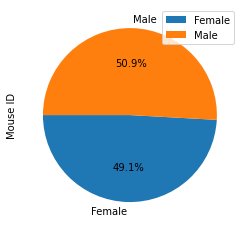

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender=df_clean_data.groupby(["Sex"]).count()
mice_gender
panda_pie = mice_gender.plot(kind="pie", y="Mouse ID", autopct="%1.1f%%", startangle=180)
figsize=(20,0)
panda_pie

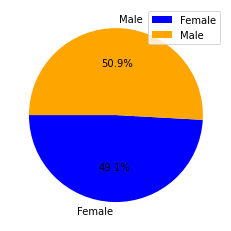

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_gender
labels=["Female", "Male"]
Colors=["Blue", "Orange"]

plt.pie(mice_gender["Mouse ID"], labels=labels, colors=Colors, autopct="%1.1f%%", startangle=180)
plt.legend(labels, loc="best")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
df_Greatest_Vol= df_clean_data.groupby(["Mouse ID"])["Timepoint"].max()
df_Greatest_Vol

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
df_volume_merge= pd.merge(df_Greatest_Vol, df_clean_data, on=(["Mouse ID", "Timepoint"]))
df_volume_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane","Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume=df_volume_merge.loc[df_volume_merge["Drug Regimen"]==treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_data.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles=tumor_volume.quantile([.25,.5,.75])
    lowerq=quartiles[.25]
    upperq=quartiles[.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    print(f"{treatment}'s potentioal outliers: {lower_bound} and {upper_bound}")



Capomulin's potentioal outliers: 20.70456164999999 and 51.83201549
Ramicane's potentioal outliers: 17.912664470000003 and 54.30681135
Infubinol's potentioal outliers: 36.83290494999999 and 82.74144559000001
Ceftamin's potentioal outliers: 25.355449580000002 and 87.66645829999999


([<matplotlib.axis.XTick at 0x7f9ad8011400>,
 [Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Ramicane'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ceftmin')])

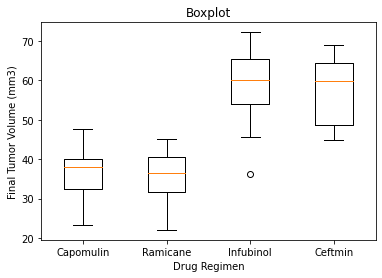

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()

ax1.boxplot(tumor_data)
ax1.set_title("Boxplot")
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
plt.xticks([1,2,3,4], ["Capomulin", "Ramicane", "Infubinol", "Ceftmin" ])

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse u364')

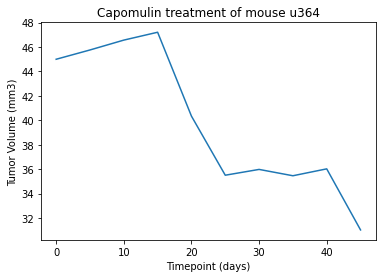

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# choosing a mouse to track within the Mouse column
u364 = df_clean_data.loc[df_clean_data["Mouse ID"]== "u364"]
u364

fig1, ax1 = plt.subplots()
# plotting the xvalue by filtering the data for the mouse data filtered
Time_x_axis =u364["Timepoint"] 
# plotting the yvalue by filtering the data for th moue data filtered
Tumor_y_axis = u364["Tumor Volume (mm3)"]
# title for the graphs and x and y
plt.plot(Time_x_axis,Tumor_y_axis)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse u364")

Text(0, 0.5, 'Average Tumor Volume (mm3)')

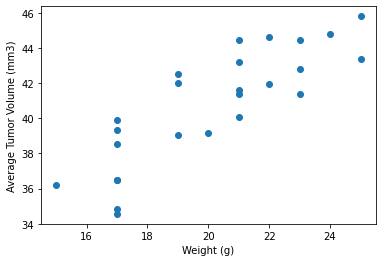

In [16]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_tumor = specific_treatment.groupby(["Mouse ID"]).mean()
average_tumor

plt.scatter(average_tumor["Weight (g)"], average_tumor["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.8419363424694718


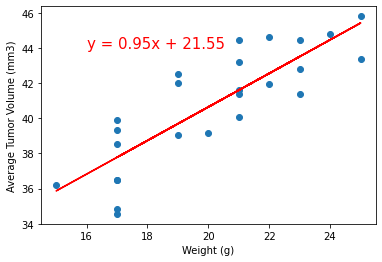

In [21]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(average_tumor["Weight (g)"], average_tumor["Tumor Volume (mm3)"])[0]
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")

x_values = average_tumor["Weight (g)"]
y_values = average_tumor["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stdrr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(average_tumor["Weight (g)"], average_tumor["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.annotate(line_eq, xy=(16,44), fontsize=15, color="red")
plt.plot(x_values, regress_values, "r-")